## (8:57am) The Art of the Bodge

At the time of writing this post, the UK is currently in the midst of a Summer bank holiday. I wanted to take this opportunity to introduce a new format of blog post that I intend to implement on every bank holiday of the following academic year. I have titled this format the 'Bank Holiday Bodge'. 

In his delightful video '[The Art of the Bodge](https://www.youtube.com/watch?v=lIFE7h3m40U)', Tom Scott describes bodging as "a wonderful British word that means to patch together". "A bodge is clumsy, it's inelegant, it'll fall apart, but it'll work" he goes on to elaborate.

I am a massive fan of 'the bodge'. Although I love a well-documented, clear, and precise code-base, sometimes that is overkill for a project; it may be much more suitable to throw together a quick [MVP](https://www.techopedia.com/definition/27809/minimum-viable-product-mvp) out there and then tidy up the loose ends when it is actually necessary. Time is money after all, and there are many scenarios when a philosophy of build-fast, fail-fast is far more appropriate than devoting days to a project that may turn out to not even solve your problem.

In this spirit, I have decided that I will spend my next year of bank holidays working on a variety of short projects. These are projects that I've had sitting in my ideas list for months or longer, but have been put off. Writing a polished blog post involves investing a large amount of time and energy and so there are many projects like these that risk waiting eternally to be written about. This blog post format is an attempt to remedy this issue and allow myself to have a short exploration of these ideas without feeling the need to produced a refined work.

On top of this, I wish to use these posts as an opportunity to explore my data science workflow. In my other blog posts, mental blocks, mistakes and points of difficulty are often hidden away. In this format, however, I want them to be the focus. I will be writing the content of this post _as_ I work on the technical side of things. I hope that this helps to capture the subtleties of development that may be lost in hindsight. 

I will go into this project with no preparation other than a few basic ideas for data sources and tooling. The idea being that the setup steps of installing packages, authenticating API access and similar mundane but potentially troublesome tasks are often swept under the rug when showcasing a project. I however, want to give them some limelight.

So, without further ado, let's begin.

## (9:16am) Introduction

A while back, a stumbled across Mario Klingemann's incredible [RasterFairy](https://github.com/Quasimondo/RasterFairy) library. This is a Python package with the goal of taking any kind of 2D point cloud and transform it into a uniform lattice grid whilst trying to preserve neighborhood relations. A GIF showing this behaviour can be found on the README of the library's GitHub repository although I have included it below for simplicity.

The original point cloud in the GIF above looks very much like the output of typical dimensionality reduction algorithms such as t-SNE and UMAP. This got me thinking. Wouldn't it be cool if I could take some sort of high-dimensional dataset, flatten it to a plane using dimensionality reduction, and then use the RasterFairy package to create an explorable grid of similarities. Even better, if the observations in the dataset corresponded to some visual element, I could arrange these in the generated grid format to produce a beautiful and explorable wall of data. The only question that remained in my mind was what dataset to use.

Without a clear idea of what data to apply this approach to, this concept was left dormant for a while. That is, until I stumbled across the following [dataset](https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018) on Kaggle. This data set relates to the top 100 tracks on Spotify from 2018 and contains a multitude of musical attributes about each song including danceability, key, loudness, and tempo. This dataset was extracted and cleaned by [Nadin Tamer](https://github.com/nadintamer) using the Spotify Web API and the `spotipy` library. There is also a 2017 version of the dataset, leaving me with 200 observations to play with.

This dataset appealed to me for two main reasons. The first is that the question of song similarity is already very ingrained in the public consciousness; we are very used to the idea of recommendation systems suggesting what song we might next want to listen to based off are currently listening (and obviously a lot more data gleaned from our historic use). Secondly, since every track in the dataset will belong to an album which will have a corresponding piece of cover art, this dataset will hopefully lead to a very attractive image to explore by the end of the project.

## (9:37am) First Steps

### (9:37am) Data Import

Before we can get anywhere we will need to import and clean the two datasets we talked about above. I plan to import these straight from Kaggle using pandas.

Oh. I guess I won't. Running the code above produced a nasty error. It turns out that you need to be logged in to download a dataset from Kaggle and so the above request attempts to read the login page as a CSV file. Let's go back to basics and import the CSVs locally.

In [35]:
import pandas as pd
top2017 = pd.read_csv('Resources/top2017.csv')
top2018 = pd.read_csv('Resources/top2018.csv')

Let's take a look at the files to make sure everything is as expected.

In [36]:
top2017.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [37]:
top2018.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


Looking good. Next we need to join the datasets. We'll first add a column to each to store which year the songs were from just in case this comes in handy at a later point.

In [38]:
top2017['year'] = 2017
top2018['year'] = 2018
topCombi = pd.concat([top2017, top2018])
topCombi = topCombi.reset_index(drop=True)

We now have a dataset of 200 tracks. Since the ended goal is to visualise these in a grid it would be nice to have a number with a nice factorisation. The best factorisation for 200 is $10\times20$ which is a weird ratio to use. Instead I have decide to throw out 4 random tracks leaving is with 196, a perfect square, which will be much better for visualising.

In [39]:
import numpy as np
np.random.seed(1729)
drop_indices = np.random.choice(topCombi.index, 4, replace=False)
topCombi = topCombi.drop(drop_indices)
topCombi = topCombi.reset_index(drop=True)

### (9:51am) Cleaning

We are now ready to perform to basic data cleansing.

The most obvious issue with the dataset is that key is encoded using the ordinals 0 to 11. This does a terrible job of capturing the behaviour of musical keys. For a start, musical keys obey a cyclical structure. From a chromatic sense, the note C (0) is just as close to C# (1) as it is to B (11) and yet this dataset puts B and C as far apart as possible. The solution to this is to map the values of this variable into locations around a circle. This can be performed using some basic trigonometry.

In [40]:
# import numpy as np - done above
topCombi['key_cos'] = np.cos(topCombi.key * (2.0 * np.pi / 12))
topCombi['key_sin'] = np.sin(topCombi.key * (2.0 * np.pi / 12))

The key of C (0) now maps to the pair (0, 1), with C# (1) mapping to (0.866, 0.5) and B (11) mapping to (0.866, -0.5). That is, C is the same distance from C# and B just as we would expect.

It could easily be argued that this alone still doesn't capture the full behaviour of keys. Ask any musician, and they would most likely say that C (0) and F (5) are more closely related than say C (0) and Eb (3) even though the latter two are closer chromatically. This is because they are more closely related through the [circle of fifths](https://www.musicnotes.com/now/tips/circle-of-fifths-guide/). It wouldn't be too difficult to create a feature for this using some basic modular arithmetic.

The issue arises when using both the chromatic and circle of fifths approach together. Neither of these perfectly capture the relations of keys by themselves and including both threatens introducing bias towards the key. I have therefore decided to stick with only cyclic chromatic distance as to layman listeners, this is the most intuitive measure of key distance. 

We can now drop the original key column.

In [41]:
topCombi = topCombi.drop('key', axis=1)

The next step in cleaning the dataset is to normalise some of the columns. The majority of the columns - such as danceability or energy - have a scale going from zero to one (their ranges are usually smaller but values of zero and one are completely valid and values often come close to them). This gives us a problem when looking at the columns tempo, duration_ms, and time_signature.

The simplest solution to this is to take each of these columns and use a linear transformation to map them to the range (0, 1). 

In [42]:
topCombi['tempo_norm'] = ((topCombi.tempo - np.min(topCombi.tempo)) /
        (np.max(topCombi.tempo) - np.min(topCombi.tempo)))
topCombi['duration_norm'] = ((topCombi.duration_ms - np.min(topCombi.duration_ms)) /
        (np.max(topCombi.duration_ms) - np.min(topCombi.duration_ms)))
# fix time signature mistake for DJ Khaled - No Brainer
topCombi['time_signature'] = topCombi.time_signature.replace(5, 4)
# time signature is only 3 or 4
topCombi['time_signature_norm'] = topCombi.time_signature - 3

As you can see on the third line of code, I had to make a correction to the dataset. This is because 'No Brainer' by DJ Khaled was marked as being in 5/4 time. Listening to the song, it is clear that that is not the case and so it was appropriate to correct this.

We can now drop the original columns.

In [43]:
topCombi = topCombi.drop(['tempo', 'duration_ms', 'time_signature'], axis=1)

In [44]:
topCombi

,id,name,artists,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,year,key_cos,key_sin,tempo_norm,duration_norm,time_signature_norm
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,2017,8.660254e-01,0.500000,0.230067,0.428732,1.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,2017,5.000000e-01,0.866025,0.177848,0.413580,1.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,2017,5.000000e-01,0.866025,0.836723,0.411635,1.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,2017,8.660254e-01,-0.500000,0.282257,0.470434,1.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,2017,-8.660254e-01,-0.500000,0.118506,0.598949,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,630sXRhIcfwr2e4RdNtjK,Rewrite The Stars,Zac Efron,0.684,0.619,-7.005,1.0,0.0386,0.0716,0.000000,0.1220,0.2840,2018,5.000000e-01,-0.866025,0.445505,0.378266,1.0
192,2xmrfQpmS2iJExTlklLoA,I Miss You (feat. Julia Michaels),Clean Bandit,0.638,0.658,-6.318,1.0,0.0456,0.2450,0.000004,0.0919,0.3300,2018,6.123234e-17,1.000000,0.297502,0.342006,1.0
193,5WvAo7DNuPRmk4APhdPzi,No Brainer,DJ Khaled,0.552,0.760,-4.706,1.0,0.3420,0.0733,0.000000,0.0865,0.6390,2018,1.000000e+00,0.000000,0.524479,0.510254,1.0
194,1j4kHkkpqZRBwE0A4CN4Y,Dusk Till Dawn - Radio Edit,ZAYN,0.258,0.437,-6.593,0.0,0.0390,0.1010,0.000001,0.1060,0.0967,2018,8.660254e-01,-0.500000,0.853102,0.445128,1.0


## (10:21am) Dimensionality Reduction

### (10:21am) Basic Solution 

Now that are dataset is relatively clean, we can apply dimensionality reduction. I have decided to use UMAP over t-SNE due to its superior efficiency and the ease of fine-tuning the model parameters. 

I have only ever used UMAP in R before so firstly I will need to install the corresponding Python package and its dependencies.

The syntax for using UMAP in Python is incredibly easy. Here we will use default parameters and see what sort of mapping this gives us.

In [45]:
# columns to use for dimensionality reduction
topCombi_data = topCombi.drop(['id', 'name', 'artists'], axis=1)

import umap

When I first imported `umap`, I received a stream of error messages. This most likely has to do with me using Windows as my operating system (why is stable RTX support for Linux taking so long!?). A quick fix was found on [this](https://github.com/lmcinnes/umap/issues/225) GitHub issue although I don't know whether this will lead to me more downstream issues. We'll have to see, but for now we can carry on with fingers crossed.

In [46]:
# seed used for reproducibility
embedding = umap.UMAP(random_state=1729).fit_transform(topCombi_data)

Good grief. Running this produced an even more terrifying error than the last. Thankfully this problem was already discussed in this GitHub [issue](https://github.com/lmcinnes/umap/issues/74). The solution to this seems to be to go through every module file and remove any instance of `parallel=True` in function calls. I thought I could easily do this with a Powershell find replace command but the inclusion of multiple arguments, of which `parallel` could be in any place made it difficult to do this and leave a comment saying where I changed things so in the end I decided to use a semi-manual approach. This is far from an ideal solution but it works and so we can continue. [Tom Scott](https://www.youtube.com/watch?v=lIFE7h3m40U) would certainly be proud of this bodge work!

Let's now visualise our embedding. We colour by main artists as a sanity check.

In [47]:
artist_counts = topCombi.artists.value_counts()
small_artists = topCombi.artists.isin(artist_counts.index[artist_counts < 5])
main_artists = topCombi.artists.copy()
main_artists.loc[small_artists] = 'Other'

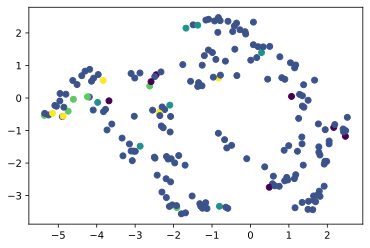

In [48]:
%config InlineBackend.figure_formats = ['svg']

import matplotlib.pyplot as plt
%matplotlib inline

x = embedding[:, 0]
y = embedding[:, 1]

plt.scatter(x, y, c=pd.factorize(main_artists)[0])
plt.show()

Great! It works. The colouring is also very reasonable considering how much an artist's style can change between songs. There is however some general regions - more purple on right, more yellow on left, etc. - which suggests that the dimensionality reduction was reasonable.

I was very close to throwing out UMAP all together and resorting to t-SNE but after seeing a generally acceptable plot produced in a few seconds, I am happy I stuck with it. Now, onto the parameters.

### (10:58am) Parameter Tweaks 

There are 3 main parameters which control the behaviour of UMAP. I will walk through them one at a time and explain how I came to choose their value.

#### (10:59am) n_neighbors

This parameter is used to control how UMAP balances local versus global structure in the data. It does this by constraining the number of local neighbours that UMAP will look at when attempting to learn the manifold structure of the data. Therefore, a low value of `n_neighbors` will push UMAP to concentrate on local structure (possibly at the detriment of the global structure) and a high  value of `n_neighbors` will push UMAP to focus on the bigger picture at the expense of some detail.

The default value for this parameter is 15 and typical values range from 2 (very local view) to 200 (highly global view). I have decided to use a value of 10. This is because, although I think some weight should be put towards the global view, I think a focus on what songs are directly similar to one another as opposed to what regions of the larger feature space they fall in is more important. 

#### (11:06 am) min_dist

The `min_dist` parameter controls how tightly UMAP is allowed to pack points together. It is literally the minimum distance apart that points are allowed to be in the embedding space. Therefore, low values of `min_dist` will allow points to more heavily clump together whereas large values will force points to have some separation and preserve the broad topological structure.

The default value for `min_dist` is 0.1 and typical values range from 0.0 to 0.99. I have decided to use a slightly larger value of `0.5`. This will help when apply the RasterFairy algorithm as the points will already be fairly evenly distributed although it is not high enough that local structure is impacted to strongly.

#### (11:12 am) metric

The `metric` parameter simply controls how distance is computed in the ambient space of the input data. Changing the metric can have significant effects on the final embedding and so care should be taken when altering it.

The default metric is the standard Euclidean. This seems generally appropriate over other Minkowski style metrics. The Chebyshev ($L_\infty$) metric could easily put two very similar songs far away in feature space because they have one significant difference whereas the Manhattan ($L_1$) metric may not adequately punish large disparities in multiple features. I haven't even considered any non-standard metrics as I think the risk of generating a useless embedding is too high.

#### (11:17 am) The Final Embedding

After tweaking the parameters we end up with this embedding. We, again, colour by the main artists.

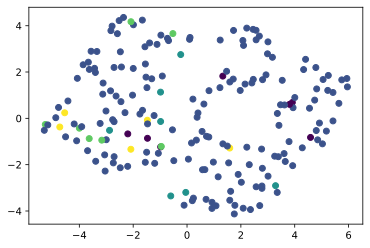

In [49]:
embedding = umap.UMAP(n_neighbors=10,
                      min_dist=0.5,
                      metric='euclidean',
                      random_state=1729).fit_transform(topCombi_data)

x = embedding[:, 0]
y = embedding[:, 1]
plt.scatter(x, y, c=pd.factorize(main_artists)[0])
plt.show()

## (11:22am) Rasterfication

We can now use the RasterFairy package to transform this embedding into a uniform grid of points. I have never used this package before so I will begin by installing it and importing.

In [50]:
import rasterfairy

Thankfully this was much smoother than installing UMAP, sparking no issues at all. The main transformation function works directly on a 2D numpy array so we can apply it straight away.

In [51]:
grid, dims = rasterfairy.transformPointCloud2D(embedding)

This last step caught me out at first. It turns out that the `transformPointCloud2D` function returns a tuple. The first entry of this is the grid we're after and the second is the grid dimensions that algorithm decided to use (in this case, 14x14, as we expected). This resulted in some very aggressive error messages from `matplotlib`. Once I figured out what was wrong, however, it was a very quick fix.

We can now visualise the result.

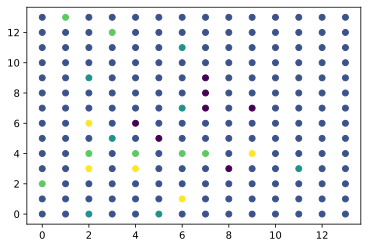

In [52]:
x = grid[:, 0]
y = grid[:, 1]
plt.scatter(x, y, c=pd.factorize(main_artists)[0])
plt.show()

Looking great! Those three purple points together in the centre are a great sign and we can also see a few green/yellow tracks near each other.

Before we continue any further, it is important to join our embedded points back with the corresponding track IDs, names, and artists.

In [53]:
grid_df = pd.DataFrame(grid, columns=['dim1', 'dim2'])
topCombi_grid = topCombi[['id', 'name', 'artists']].join(grid_df)

We can now take a look at the final result.

In [54]:
topCombi_grid.head()

,id,name,artists,dim1,dim2
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,7.0,7.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,4.0,9.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,5.0,9.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.0,9.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,13.0,1.0


As we can see, both versions Despacito are right next to each other. Things are looking good. Now, all we are left to do is download cover art and pop them into a 'wall of music' based on the above grid positions. First though, I'm going to pop out for lunch. Let's carry on come 1 o'clock.

## (12.55pm) Building the Wall

### (12.55pm) Sourcing Cover Art

In order to download album cover art, I am going to use the Spotify API. An introductory tutorial on how to use this within Python can be found [here](https://www.reddit.com/r/tifu/comments/cwb807/tifu_by_going_on_a_date_thinking_it_was_a_job/). When scanning through this guide, I realised that I have made a bit of an oversight with regards to this project.

I had assumed that the top tracks data set I was using was a bespoke generation. Since the dataset only existed for two years it seemed reasonable that the song attributes had been generated by Nadin Tamer, the uploader of the dataset. It turns out though, that the Spotify API can give you these attributes for any song. It therefore seems very limiting to look at only that small sample of 200. Never-the-less, we are too far in now to go back.

This is a perfect lesson on the art of 'the bodge'. Yes, using only those 200 tracks is limiting. Yes, if I were to redo this project, I would have used the Spotify API directly. But, it doesn't matter. Once I have reached a MVP, small tweaks like that are easy to implement. Perhaps if I ever have new inspiration for this project, I will return and use a much wider range a tracks.

This oversight aside, I can begin scraping album cover art. The first step in doing this is to apply for Spotify API permissions and credentials as per the tutorial. This is relatively painless.

In [55]:
with open('Resources/spotify_creds.txt', 'r') as f:
    my_id, my_secret = f.read().split() 

Then after installing the `spotipy` package, we are ready to start scraping.

In [56]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

my_creds_manager = SpotifyClientCredentials(client_id=my_id, 
                                            client_secret=my_secret)
sp = spotipy.Spotify(client_credentials_manager=my_creds_manager)

First we test that everything is working with an example query.

In [57]:
name = "Lobachevsky"
result = sp.search([name])
result['tracks']['items'][0]['artists'][0]['name']

'Tom Lehrer'

[Just as expected](https://open.spotify.com/album/5o09sPOG645dDUGKaLG2U6). We can now loop through each track ID in our dataset, find the album the track belongs to, and then download the corresponding cover art.

No luck. Running the code above will return an error, stating that the ID used is invalid. This is very reasonable as manually entering the ID as part of a Spotify URL gives a 404 error. Perhaps the song IDs are mutable and have since changed. We'll have to resort to plan B - search each song using the given name and artist and then take the top result.

Notice how I set `market='GB'` in the call to the search function. I have no idea what this is needed and it took me quite a while to figure this out. You'd think an API like this would not be region specific, but with it the number of returned results is zero on many searches. At to the peculiarity, setting this to `market='US'` didn't help at all.

In [115]:
import urllib.request

for __, row in topCombi_grid.iterrows():
    track_id = row['id']
    name = row['name']
    artist = row['artists']
    result = sp.search(f'{name} {artist}', market='GB')
    try:
        # get cover art URL and check size
        album = result['tracks']['items'][0]['album']
        cover_url = album['images'][1]['url']
        dim = album['images'][1]['height']
        assert dim == 300
        # download cover art
        urllib.request.urlretrieve(cover_url, f'Resources/cover_art/{track_id}.jpg')
    except IndexError:
        print(f'No results for {name} by {artist} [{track_id}]')

No results for Te Bot? - Remix by Nio Garcia [3V8UKqhEK5zBkBb6d6ub8]
No results for D?jala que vuelva (feat. Manuel Turizo) by Piso 21 [1j6xOGusnyXq3l6IryKF3]


For 186 out of the 196 tracks we are using, this worked perfectly. The other 8 tracks however caused some trouble. This is because they contain special characters which haven't been encoded. I tried to trace back where this issue comes from and it turns out that this present in the original dataset. Since only a few tracks are troublesome, I will manually edit any missed special characters with the nearest ASCII equivalent and re-scrape.

In [118]:
replacements = {
    'Te Bot? - Remix': 'Te Bote - Remix',
    '?chame La Culpa': 'Echame La Culpa',
    'Ti?sto': 'Tiesto',
    'D?jala que vuelva (feat. Manuel Turizo)': 'Dejala que vuelva (feat. Manuel Turizo)',
    'Taki Taki (with Selena Gomez, Ozuna & Cardi B)': 'Taki Taki (feat. Selena Gomez, Ozuna & Cardi B)',
    'Perfect Duet (Ed Sheeran & Beyonc?)': 'Perfect Duet (Ed Sheeran & Beyonce)',
    'Coraz?n (feat. Nego do Borel)': 'Corazon (feat. Nego do Borel)',
    'S?guelo Bailando': 'Siguelo Bailando'
}
topCombi_grid = topCombi_grid.replace(replacements)

In [119]:
import urllib.request

for index, row in topCombi_grid.iterrows():
    track_id = row['id']
    name = row['name']
    artist = row['artists']
    if name in replacements.values() or artist in replacements.values():
        result = sp.search(f'{name} {artist}', market='GB')
        try:
            # get cover art URL and check size
            album = result['tracks']['items'][0]['album']
            cover_url = album['images'][1]['url'] # 300px versions
            dim = album['images'][1]['height']
            assert dim == 300
            # download cover art
            urllib.request.urlretrieve(cover_url, f'Resources/cover_art/{track_id}.jpg')
        except IndexError:
            print(f'No results for {name} by {artist} [{track_id}]')

After running both of these code blocks, we still only have 188 pieces of cover art. After some digging, I discovered that this is because some songs are included in both the 2017 and 2018 dataset. Since we already have the 196 points we want for a nice square grid this is too late to fix. I can't see this presenting any other issues than duplication however so we can let it slide.

### (2.03pm) Zoomifying

Before we look at displaying the cover art wall in an interactive format, we need to use Python to 'glue' our images together using the grid above. This can be done fairly easily using the built-in `Image` module of the Python Imaging Library (PIL).

My original plan was to the [OpenSeadragon viewer](https://openseadragon.github.io/) to visualise the final wall of songs. This was because it has features for adding overlays which I could use to caption the songs when the user hovers over a certain piece of cover art. After reading through the documentation today in preparation for use, I very quickly decided that this is not the best approach. The method for adding overlays is poorly documented and really knowledge of jQuery, and the Python package is very minimal in its feature set so offers no help.

I have instead decided to embed the labels in the combined image itself using the `ImageDraw` and `ImageFont` modules from PIL. I will then use a more friendly image viewer called [Zoomify](http://www.zoomify.com). I would much prefer to have a interactive labels on the image but if I want to keep this project under a day long, that will not be possible.

In [155]:
from PIL import Image, ImageDraw, ImageFont

# constants
TINT_COLOR = (0, 0, 0)  # black
TRANSPARENCY = .50  # degree of transparency
OPACITY = int(255 * TRANSPARENCY)

img = Image.new('RGBA', (4200, 4200))
fnt = ImageFont.truetype('Resources/Arial Bold.ttf', 11
for __, row in topCombi_grid.iterrows():
    x_pos = row['dim1']
    y_pos = row['dim2']
    track_id = row['id']
    name = row['name']
    artist = row['artists']
    # paste cover art onto wall
    with Image.open(f'Resources/cover_art/{track_id}.jpg') as tmp:
        img.paste(tmp, (int(x_pos * 300), int(y_pos * 300)))
    # create transparent background for label
    overlay = Image.new('RGBA', img.size, TINT_COLOR+(0,))
    draw = ImageDraw.Draw(overlay)
    draw.rectangle(((int(x_pos * 300), int(y_pos * 300)), 
                    (int((x_pos + 1) * 300), int(y_pos * 300 + 20))), 
                   fill=TINT_COLOR+(OPACITY,))
    img = Image.alpha_composite(img, overlay)
    # add song/artist label
    d = ImageDraw.Draw(img)
    d.text((int(x_pos * 300 + 5), int(y_pos * 300 + 5)), f"{name} - {artist}", font = fnt, fill=(255, 255, 255))
# remove alpha channel
img = img.convert('RGB')
img.save("Resources/cover_art_wall.jpg")

This leaves us with a whopping 4200x4200 pixel image. Thankfully due to JPG compression, this still only comes to a few megabytes.

The finish line is in sight. The last step is to add Zoomify Javascript code to our site and add some code to this page to create a viewer for our image. When that is all complete, this is what we end up with. A full screen version can be viewed [here](http://extrazoom.com/image-106277.html?heuln50x50).


## (3.47pm) Evaluation

### Performance

As one-day sprints go, I think this has been quite successful. There were several obstacles along the way that could have put an end to the project yet these were carefully circumvented. The part of this project that took up the most time was certainly the setup of an image viewer. Trying to achieve this took me down many false pathways and in the end I only reached a solution by throwing up my hands in defeat and using an iframe. 

What made this so challenging is two-fold. Firstly, my knowledge of web development, and in particular Javascript/jQuery, is rather limited. Even if I was more knowledgeable, though, I think this still would have been a real challenge since this website is not directly made of static, mutable files but rather built from small generic components that are then used by the static site generator Hexo to build the final site. This adds a whole other layer of complexity to setting up a viewer. 

I think this methodology shows promise, though. I am not at all well-versed in the popular music of this decade so it is difficult for me to give a detailed analysis of performance. I can, however, point out a few features which give me some confidence that there is potential. 

For a start, we can see obvious clumping of tracks by the same artist. Ed Sheeran and Drake in the middle, Migos at the bottom, Marshmello on the right. We can also see similar styles of artist together such as Maroon 5 and Bruno Bars at the top.

### Limitations



The limitations of this project are quite clear. The most obvious is the failure to implement an image viewer in the way that I wanted. If I were to redo this project properly, this is where I would focus my resources, perhaps asking someone more knowledgeable on the subject for support.

The handling of special characters when collecting cover art prevents instantly scalability, but since this is an artifact of the data source (which I wouldn't be using if I were to expand this project) I don't see this as a major limitation

 ### Where Next?

Now that I am aware of how easy it is to source attributes for any song on Spotify, this opens up to possibility for producing a similar analysis for a wider range of music - perhaps the top 50 albums of the last 50 years. Even further, a bold idea would be to create a web-app that allowed a user to sign into Spotify and create a 'wall of music' for themselves. This is certainly beyond my current understanding of web development but as I learn more about the field, this may become a possibility.

The time is 4:23pm. I'll have a read through the post, do a bit of spell checking, and then I think I'll 'head home' early.